# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [4]:
# Combine the data into a single DataFrame

## use of merging INNER

data_merged = pd.merge(study_results,mouse_metadata,on='Mouse ID')

# Display the data table for preview
data_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.

## use of UNIQUE function

nbmice = len(data_merged['Mouse ID'].unique())
nbmice

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint

## use of DUPLICATE function on both columns ; Mouse ID, Timepoint

duplicates = data_merged.duplicated(subset=['Mouse ID','Timepoint'],keep=False)

data_duplicate = data_merged[duplicates]

## print if we need to control
#print(data_duplicate)


In [7]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

## use UNIQUE function on the duplicate dataframe

badmouse = data_duplicate['Mouse ID'].unique()
badmouse

array(['g989'], dtype=object)

In [8]:
## create am array to be used in filtring

badmouse_df= pd.array(badmouse)
badmouse_df

<StringArray>
['g989']
Length: 1, dtype: string

In [9]:
# Optional: Get all the data for the duplicate mouse ID.

## use FILTRING and ISIN function with help of the array created above (badmouse)

duplicate_mice = data_merged[data_merged['Mouse ID'].isin(badmouse_df)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

## use filtring with opposit condition "~" to the filter above

clean_df = data_merged[ ~ data_merged['Mouse ID'].isin(badmouse_df)]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
nbmice_clean = len(clean_df['Mouse ID'].unique())
nbmice_clean

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.


volume_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
volume_mediane = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
volume_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
volume_sd = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
volume_stderr = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({
    'Mean Tumor Volume' : volume_mean,
    'Median Tumor Volume' : volume_mediane,
    'Tumor Volume Variance' : volume_variance,
    'Tumor Volume Std. Dev.' : volume_sd,
    'Tumor Volume Std. Err.' : volume_stderr
    })

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_aggregation = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : [np.mean,np.median,np.var,np.std,'sem']})

summary_aggregation


C:\Users\nazim\AppData\Local\Temp\ipykernel_12804\992773621.py:6: FutureWarning: The provided callable <function mean at 0x000001790383EE80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary_aggregation = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : [np.mean,np.median,np.var,np.std,'sem']})
C:\Users\nazim\AppData\Local\Temp\ipykernel_12804\992773621.py:6: FutureWarning: The provided callable <function median at 0x0000017903A58FE0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  summary_aggregation = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : [np.mean,np.median,np.var,np.std,'sem']})
C:\Users\nazim\AppData\Local\Temp\ipykernel_12804\992773621.py:6: FutureWarning: The provided callable <function v

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen 

## calculate data
drugs_count = clean_df.groupby('Drug Regimen')[['Mouse ID','Timepoint']].count()
drugs_count = drugs_count.sort_values("Mouse ID",ascending=False)
drugs_count.head()


,Mouse ID,Timepoint
Drug Regimen,,
Capomulin,230,230
Ramicane,228,228
Ketapril,188,188
Naftisol,186,186
Zoniferol,182,182


Text(0, 0.5, '# of Observed Mouse Timepoints')

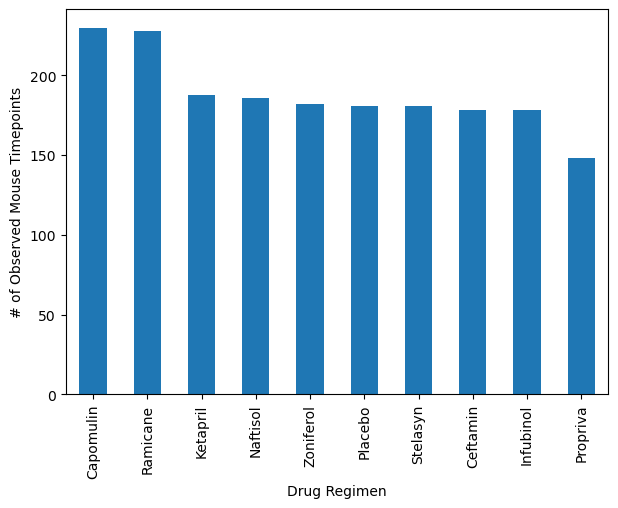

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen 
## USING PANDA.

drugs_count1 = drugs_count['Mouse ID']
drugs_count1.plot(kind= "bar", figsize=(7,5))

plt.xticks(rotation= 90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

Text(0, 0.5, '# of Observed Mouse Timepoints')

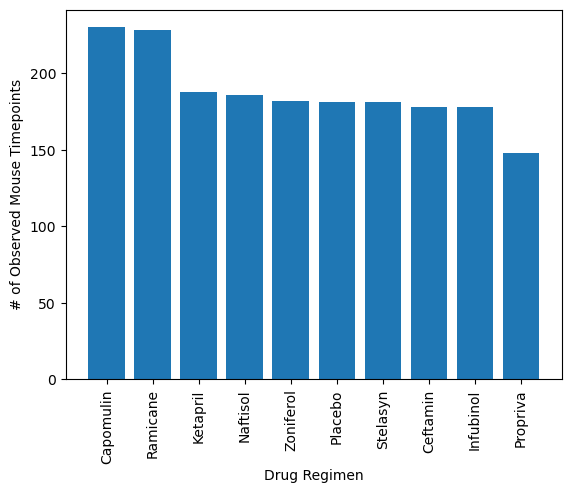

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen 
## USING PYPLOT.

plt.bar(drugs_count.index,drugs_count['Mouse ID'])

plt.xticks(rotation= 90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

In [17]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

## Get the unique mice with their gender uning DROPDUPLICATES on the DF

mice_gender = clean_df[['Mouse ID','Sex']].drop_duplicates()
data_gender = mice_gender['Sex'].value_counts()
data_gender

Sex
Male      125
Female    123
Name: count, dtype: int64

Text(0.0, 1.0, 'Count')

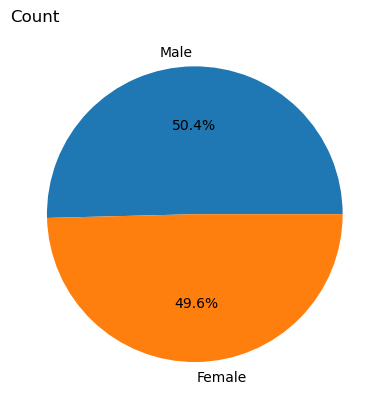

In [18]:
## Make the pie chart
## USING PYPLOT


labels = data_gender.index
plt.pie(data_gender, labels=labels, autopct="%1.1f%%")

plt.title('Count', loc='left')


<Axes: ylabel='count'>

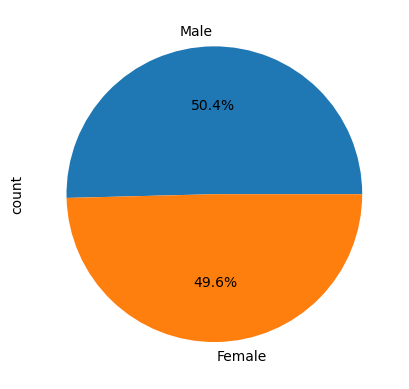

In [19]:
## Make the pie chart
# ## USING PANDA

data_gender.plot(kind="pie",labels=labels, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

timepointmax = clean_df.groupby(['Mouse ID'])["Timepoint"].max()
timepointmax = pd.DataFrame(timepointmax)

## reset the index

timepointmax.reset_index

timepointmax.head()


,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [21]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_last_volume = pd.merge(timepointmax, clean_df, on=["Mouse ID",'Timepoint'])
tumor_last_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [22]:
# Put treatments into a list for for loop (and later for plot labels)

selected_treatments_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']


In [23]:
## filter the 'tumor volume'  DF regarding the list of drugs selected
## this DF will be used during the next steps 

tumor_last_volume_filt = tumor_last_volume['Drug Regimen'].isin(selected_treatments_list)
tumor_last_volume_filt = tumor_last_volume[tumor_last_volume_filt]


print(f' list of drugs in the df {tumor_last_volume_filt['Drug Regimen'].unique()}')
print(tumor_last_volume_filt.head())

 list of drugs in the df ['Infubinol' 'Ceftamin' 'Ramicane' 'Capomulin']
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a203         45           67.973419                 2    Infubinol   
1     a251         45           65.525743                 1    Infubinol   
3     a275         45           62.999356                 3     Ceftamin   
6     a411         45           38.407618                 1     Ramicane   
7     a444         45           43.047543                 0     Ramicane   

      Sex  Age_months  Weight (g)  
0  Female          20          23  
1  Female          21          25  
3  Female          20          28  
6    Male           3          22  
7  Female          10          25  


In [24]:
# Create empty list to fill with tumor vol data (for plotting)

## create an empty DICTIONARY to store the volume for the drugs
## this dict will be also used to generated the scatterplot

selected_treatments_dict= {}

### LOOPING to create a key for each drug

for treatment in selected_treatments_list:
    selected_treatments_dict[treatment] = []

### looping the rows to retrieve the tumor's volume + add it to the appropriate treatment list in dict

for index, row in tumor_last_volume_filt.iterrows():
    drug = row['Drug Regimen']
    new_vol = row['Tumor Volume (mm3)']
    selected_treatments_dict[drug].append(new_vol)


print(selected_treatments_dict)

{'Capomulin': [38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384], 'Ramicane': [38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575], 'Infubinol': [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 6

In [25]:
### create a distinct list for each drug includes tumor's volume
### this step is a duplicate with the step below but is done  to be in line with requirements

for treatment in selected_treatments_dict:
    globals()[f'{treatment.lower()}_LIST'] = selected_treatments_dict[treatment]

In [26]:
# Determine outliers using upper and lower bounds

## Loop through th selected treatments dict, and calculate :Q1, Q3, IQR + extract outliers for each drug

for treatment in selected_treatments_dict:
    
    # Access the dynamically created list for each drug

    treatment_list = globals()[f'{treatment.lower()}_LIST']
    
    # Convert the list to a numpy array : to perform calculation

    volumes = np.array(treatment_list)
    
    # Calculate the lower and upper quartiles (Q1, Q3)

    q1 = np.quantile(volumes, 0.25)
    q3 = np.quantile(volumes, 0.75)
    
    # Calculate the Interquartile Range (IQR)

    iqr = q3 - q1
    
    # filter each volume list to extract outliers using : IQR rule 

    outliers = volumes[(volumes > (q3 + (iqr * 1.5))) | (volumes < (q1 - (iqr * 1.5)))].tolist()
    
    # Store outliers in a new variable

    globals()[f'{treatment.lower()}_outliers'] = outliers

    # Print the results for each treatment
    print(f'{treatment} potential outliers: {outliers}')


Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


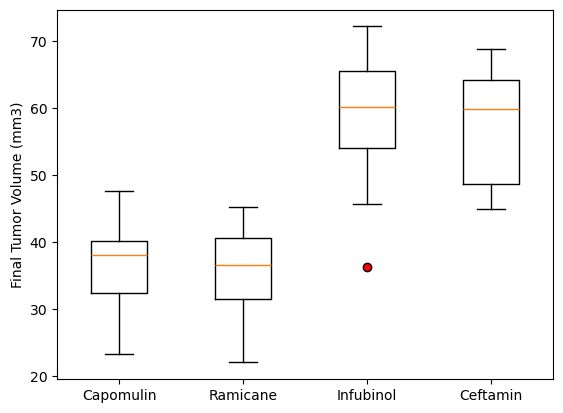

In [27]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.boxplot(selected_treatments_dict.values(), labels=selected_treatments_dict.keys(), flierprops={'marker':'o', 'markerfacecolor':'r'})
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

y793


<function matplotlib.pyplot.show(close=None, block=None)>

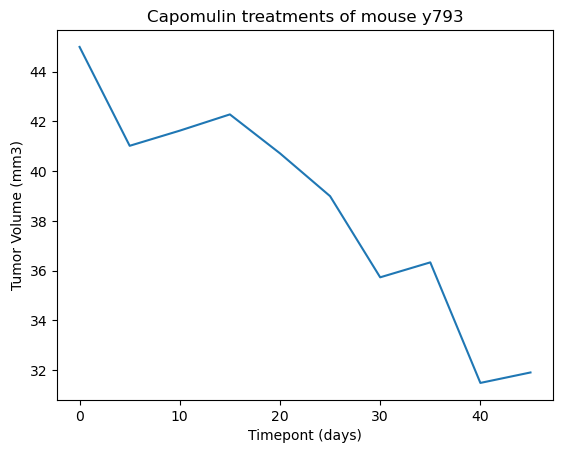

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

## Choose a RANDOM mouse from capomulin tested mice

the_one = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
the_one = the_one['Mouse ID'].unique()
the_one = np.random.choice(the_one,1)
the_one = the_one[0]
print(the_one)

## extract tests of the selected mouse

the_one_journey = clean_df[clean_df['Mouse ID']== the_one]
###print(the_one_journey)

## create the line plot

x_axis = the_one_journey['Timepoint']
y_axis = the_one_journey['Tumor Volume (mm3)']
title_text = f"Capomulin treatments of mouse {the_one}"

plt.plot(x_axis,y_axis)

plt.xlabel('Timepont (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(title_text)

plt.show


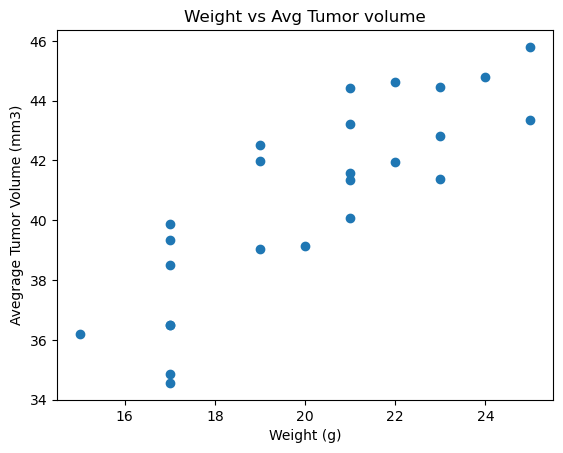

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## filter druf data AND 
## calculate the mean 
### aggregate with groupby both 'Weight' + 'tumor volume' with mean

capomulin_filt = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

capomulin_filt = capomulin_filt.groupby(['Mouse ID','Weight (g)']).agg({
    'Weight (g)' : 'mean',
    'Tumor Volume (mm3)' : 'mean'
    })
capomulin_filt = pd.DataFrame(capomulin_filt)

# print(capomulin_filt)

## scater plot
x_axis2 = capomulin_filt['Weight (g)']
y_axis2 = capomulin_filt['Tumor Volume (mm3)']

plt.scatter(x_axis2,y_axis2)

plt.xlabel('Weight (g)')
plt.ylabel('Avegrage Tumor Volume (mm3)')
plt.title('Weight vs Avg Tumor volume')

plt.show()


## Correlation and Regression

In [66]:
# Calculate the correlation coefficient 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

pearson_r,statistic= st.pearsonr(x_axis2,y_axis2)

print(f' The correlation between mouse weight and the average tumor volume is {round(pearson_r,2)}')



 The correlation between mouse weight and the average tumor volume is 0.84


In [39]:
## import function linregress from scipy.sci
from scipy.stats import linregress

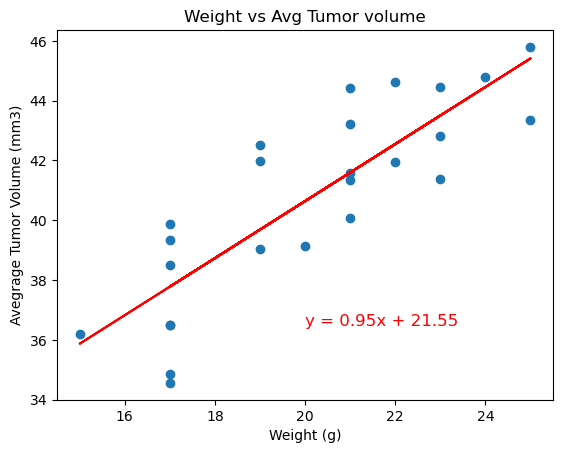

In [65]:
x_axis2 = capomulin_filt['Weight (g)']
y_axis2 = capomulin_filt['Tumor Volume (mm3)']

## calculate slope and intercept of the regression equation

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis2, y_axis2)

### generate the equation to be used as annotation
regress_values = x_axis2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



## generate the regression line plot 

plt.scatter(x_axis2,y_axis2)
plt.plot(x_axis2,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Avegrage Tumor Volume (mm3)')
plt.title('Weight vs Avg Tumor volume')

plt.annotate(line_eq,(0.5,0.2), fontsize=12,color="red", xycoords='axes fraction')

plt.show()